# En busca de órbitas periódicas

In [14]:
#paqueterias predefinidas de julia
using PyPlot
using SymPy
using TaylorSeries
using StaticArrays
using PyCall
using LaTeXStrings
using LinearAlgebra
using ForwardDiff

In [15]:
#importamos las implementaciones, del metodo de parametrizacion y del metodo de puntos fijos.
push!(LOAD_PATH,"/home/evelynalvarez/Documents/Tesis-v-1.0.2/Programas/IPM")
push!(LOAD_PATH,"/home/evelynalvarez/Documents/Matematicas/Proyectos/Implementacion")

7-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "/home/evelynalvarez/Documents/Tesis-v-1.0.2/Programas/IPM"
 "/home/evelynalvarez/Documents/Matematicas/Proyectos/Implementacion"
 "/home/evelynalvarez/Documents/Tesis-v-1.0.2/Programas/IPM"
 "/home/evelynalvarez/Documents/Matematicas/Proyectos/Implementacion"

In [16]:
# importamos los modulos locales.
using ParametrizacionMetodo
using PeriodicosSymmetries

# 🔵 Definimos el mapeo cuadrático

In [17]:
function MapeoNT(r,a,b)
    x = r[1]
    y = r[2]
    vy =  y - b*(sin(2pi*x))
    vx = x + a*(1.0-vy^2)
    return [vx,vy]
end

MapeoNT (generic function with 1 method)

In [18]:
#definimos los valores de  a y b
a = 0.2625
b = 0.44

0.44

In [19]:
#definimos las simetrias, las necesitamos en forma de vector y en forma de función
simetria1v(x,y) = [0,y]
simetria2v(x,y) = [1/2,y]
simetria3v(x,y) = [(a*(1-y^2))/2.0,y]
simetria4v(x,y) = [(a*(1-y^2))/2.0 + 1/2.0,y]
simetria1f(x,y) = x
simetria2f(x,y) = x-1/2.0
simetria3f(x,y) = x - (a*(1-y^2))/2.0
simetria4f(x,y) = x - (a*(1-y^2))/2.0 - 1/2.0


simetria4f (generic function with 1 method)

In [20]:
#definimos unas listas que serán las línea de simetría del mapeo.
listasim1Y = [y for y in -1.0:0.1:1.0] 
listasim1X = [0.0 for y in listasim1Y]
listasim2X = [1/2 for y in listasim1Y]
listasim3X = [(a*(1-y^2))/2.0 for y in listasim1Y]
listasim4X = [(a*(1-y^2))/2.0 + 1/2.0 for y in listasim1Y];

🔵 Definimos un mapeo para graficar el espacio fase para diferentes puntos. 

In [21]:
function IterarMap(f, x_ini, n)   #Definimos una función para iterar el mapeo

    x = x_ini[1]                      #                                     #Damos condiciones iniciales
    y = x_ini[2]                          #
    
    iteradosMapX = [x]
    iteradosMapY = [y]               #Definimos dos listas que tendran los valores de cada par ordenado de theta y P, y agregamos las condiciones iniciales

    for i=0:n              #iniciamos un ciclo de iteraciones donde se calculan x_n, y_n y se agregan a lalista correspodiente
        F = f(x,y)

        push!(iteradosMapX,F[1])
        push!(iteradosMapY,F[2])
        
       x = F[1]
       y = F[2]

    end

    return iteradosMapX, iteradosMapY  #La funcion iterados regresa las listas que corresponden a la trayectoria del

end



IterarMap (generic function with 1 method)

In [22]:
#para graficarlo
function GraficarMap(f)
    n = 50
    s = 1/20.
    i=0.
    for p_i=0:s:1
        for x_i =-1:s:1
            i=i+1
            x_ini=[p_i,x_i]
            a,b = IterarMap(f,x_ini,n)
            p = scatter(a,b,marker=".",s=0.1,color="gray")
            
        end
    end

end

GraficarMap (generic function with 1 method)

In [23]:
coloresp = ["salmon","gold","yellowgreen","lightseagreen","dodgerblue","skyblue","blueviolet","mediumorchid", 
            "hotpink", "palegreen", "darkorange", "forestgreen", "teal", "royalblue", "mediumpurple", "mediumorchid",
            "orchid", "greenyellow", "khaki" ,"sandybrown", "darkturquoise", "mediumseagreen"];

In [24]:
#Definimos una función para iterar el mapeo y usar la función de iterar.
function MapeoN(x::Any,y::Any,a::Real, b::Real)
    y_n =  y - b*(sin(2pi*x))
    x_n = mod(x + a*(1.0-y_n^2),1)
    return [x_n,y_n]
end

MapeoN (generic function with 1 method)

In [25]:
#como en este caso vamos a trabajar con varios valores del parámetro definimos una función para un 
# parámetro fijo 
Mapeo0(x,y)=MapeoN(x,y,a,b)

Mapeo0 (generic function with 1 method)

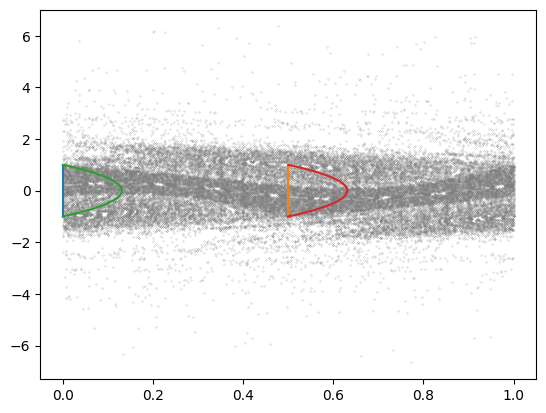

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc688b90e20>

In [26]:
GraficarMap(Mapeo0)
plot(listasim1X, listasim1Y, label = "")
plot(listasim2X, listasim1Y, label = "")
plot(listasim3X, listasim1Y, label = "")
plot(listasim4X, listasim1Y, label = "")
#xlim(-0.01,1.01)


In [27]:
#definimos funciones para el mapeo iterado.
Mapeo1A(x,y)=MapeoN(x,y,a,b)

Mapeo1A (generic function with 1 method)

In [28]:
#funcion que se usa en el método de puntos periódico
Mapeo1B(x) = MapeoNT(x,a,b)

Mapeo1B (generic function with 1 method)

### 💠 periodo 4

In [29]:
periodoM4 = []
#append!(periodoM4 , [periodicosN(Mapeo1B,simetria1v,simetria2f,2,1/4)])
append!(periodoM4 , [periodicosN(Mapeo1B,simetria3v,simetria4f,2,1/4)])

1-element Array{Any,1}:
 [0.12300356488897236, 0.25065909478474097]

In [30]:
#Buscaperiodo(periodoE30[1],EstandardMap7,1,1e-10)
Buscaperiodo(periodoM4[1],Mapeo1B,1,1e-10)

4.0

In [31]:
ErrorONE(punto, periodo) = min(mod(norm(punto-composition(Mapeo1B,periodo)(punto)),1), 
                            abs(1-mod(norm(punto-composition(Mapeo1B,periodo)(punto)),1)))

ErrorONE (generic function with 1 method)

In [32]:
ErrorP4 =[]
#append!(ErrorP30,ErrorONE(periodoE30[1],30))
append!(ErrorP4,ErrorONE(periodoM4[1],4))

1-element Array{Any,1}:
 0.0

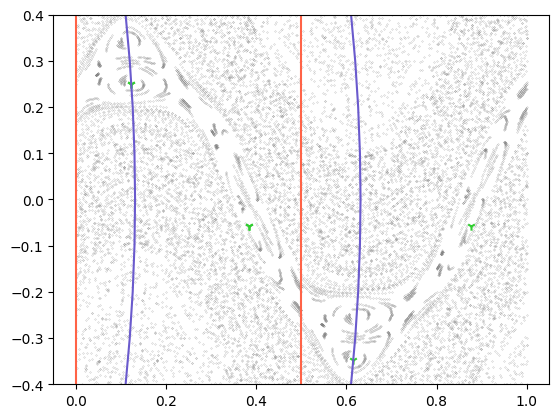

In [33]:
listaper4 = iterar(Mapeo1B,periodoM4[1],5,1);
GraficarMap(Mapeo1A)
scatter(listaper4[1],listaper4[2], marker = "1", color = "limegreen")
plot(listasim1X, listasim1Y, label = "", color = "tomato")
plot(listasim2X, listasim1Y, label = "", color = "tomato")
plot(listasim3X, listasim1Y, label = "", color = "slateblue")
plot(listasim4X, listasim1Y, label = "", color = "slateblue")
# xlim(-0.01,1.01)
ylim(-0.4,0.4)
savefig("MapeoCP4A.pdf")

## Diferentes parametros

In [34]:
a = 0.618
b = 0
#funcion que se usa en el método de puntos periódico
Mapeo2B(x) = MapeoNT(x,a,b)
#definimos funciones para el mapeo iterado.
Mapeo2A(x,y)=MapeoN(x,y,a,b)

#definimos unas listas que serán las línea de simetría del mapeo.
listasim1Y = [y for y in -1.0:0.1:1.0] 
listasim1X = [0.0 for y in listasim1Y]
listasim2X = [1/2 for y in listasim1Y]
listasim3X = [(a*(1-y^2))/2.0 for y in listasim1Y]
listasim4X = [(a*(1-y^2))/2.0 + 1/2.0 for y in listasim1Y];
#definimos las simetrias, las necesitamos en forma de vector y en forma de función
simetria1v(x,y) = [0,y]
simetria2v(x,y) = [1/2,y]
simetria3v(x,y) = [(a*(1-y^2))/2.0,y]
simetria4v(x,y) = [(a*(1-y^2))/2.0 + 1/2.0,y]
simetria1f(x,y) = x
simetria2f(x,y) = x-1/2.0
simetria3f(x,y) = x - (a*(1-y^2))/2.0
simetria4f(x,y) = x - (a*(1-y^2))/2.0 - 1/2.0


simetria4f (generic function with 1 method)

### Periodo 5

In [35]:
periodoM5 = []
append!(periodoM5 , [periodicosN(Mapeo2B,simetria1v,simetria4f,3,3/5)])

1-element Array{Any,1}:
 [0.0, 0.8224204548348395]

In [36]:
Buscaperiodo(periodoM5[1],Mapeo2B,1,1e-10)

5.0

In [37]:
ErrorOrdenNM(punto, periodo, Mapeo) = min(mod(norm(punto-composition(Mapeo,periodo)(punto)),1), 
                            abs(1-mod(norm(punto-composition(Mapeo,periodo)(punto)),1)))

ErrorOrdenNM (generic function with 1 method)

In [38]:
ErrorP5 =[]
append!(ErrorP5,ErrorOrdenNM(periodoM5[1],5, Mapeo2B))

1-element Array{Any,1}:
 0.0

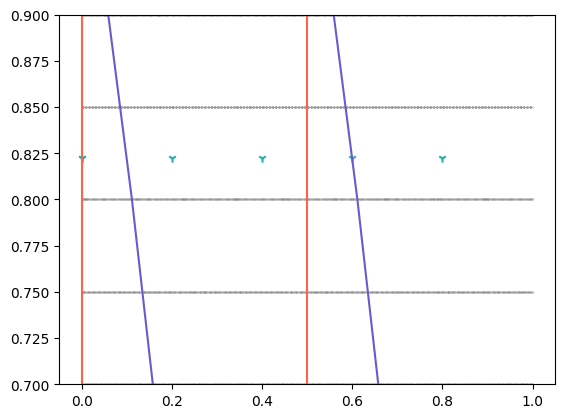

In [39]:
listaper5 = iterar(Mapeo2B,periodoM5[1],5,1);
GraficarMap(Mapeo2A)
scatter(listaper5[1],listaper5[2], marker = "1", color = coloresp[4])
plot(listasim1X, listasim1Y, label = "", color = "tomato")
plot(listasim2X, listasim1Y, label = "", color = "tomato")
plot(listasim3X, listasim1Y, label = "", color = "slateblue")
plot(listasim4X, listasim1Y, label = "", color = "slateblue")
# xlim(-0.01,1.01)
ylim(0.7,0.9)
savefig("MapeoCP5B.pdf")

In [40]:
a = 0.618
b = 0.1
#funcion que se usa en el método de puntos periódico
Mapeo3B(x) = MapeoNT(x,a,b)
#definimos funciones para el mapeo iterado.
Mapeo3A(x,y)=MapeoN(x,y,a,b)

#definimos unas listas que serán las línea de simetría del mapeo.
listasim1Y = [y for y in -1.0:0.1:1.0] 
listasim1X = [0.0 for y in listasim1Y]
listasim2X = [1/2 for y in listasim1Y]
listasim3X = [(a*(1-y^2))/2.0 for y in listasim1Y]
listasim4X = [(a*(1-y^2))/2.0 + 1/2.0 for y in listasim1Y];
#definimos las simetrias, las necesitamos en forma de vector y en forma de función
simetria1v(x,y) = [0,y]
simetria2v(x,y) = [1/2,y]
simetria3v(x,y) = [(a*(1-y^2))/2.0,y]
simetria4v(x,y) = [(a*(1-y^2))/2.0 + 1/2.0,y]
simetria1f(x,y) = x
simetria2f(x,y) = x-1/2.0
simetria3f(x,y) = x - (a*(1-y^2))/2.0
simetria4f(x,y) = x - (a*(1-y^2))/2.0 - 1/2.0


simetria4f (generic function with 1 method)

### Periodo 5

In [41]:
periodoM5A = []
append!(periodoM5A , [periodicosN(Mapeo3B,simetria1v,simetria4f,3,3/5)])

1-element Array{Any,1}:
 [0.0, 0.8818504314089848]

In [42]:
Buscaperiodo(periodoM5A[1],Mapeo3B,1,1e-10)

5.0

In [43]:
ErrorP5A =[]
append!(ErrorP5A,ErrorOrdenNM(periodoM5A[1],5, Mapeo3B))

1-element Array{Any,1}:
 2.220446049250313e-16

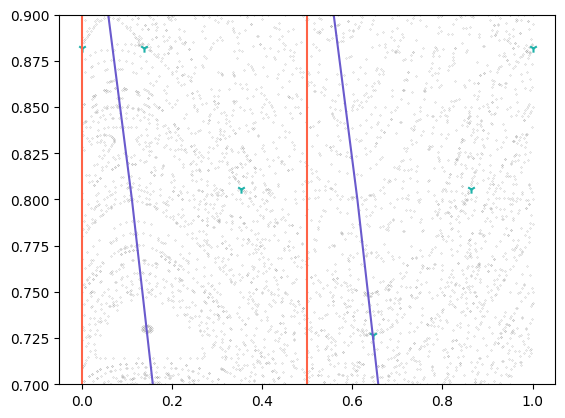

In [44]:
listaper5 = iterar(Mapeo3B,periodoM5A[1],5,1);
GraficarMap(Mapeo3A)
scatter(listaper5[1],listaper5[2], marker = "1", color = coloresp[4])
plot(listasim1X, listasim1Y, label = "", color = "tomato")
plot(listasim2X, listasim1Y, label = "", color = "tomato")
plot(listasim3X, listasim1Y, label = "", color = "slateblue")
plot(listasim4X, listasim1Y, label = "", color = "slateblue")
# xlim(-0.01,1.01)
ylim(0.7,0.9)
savefig("MapeoCP5C.pdf")

In [45]:
a = 0.618
b = 0.2
#funcion que se usa en el método de puntos periódico
Mapeo3B(x) = MapeoNT(x,a,b)
#definimos funciones para el mapeo iterado.
Mapeo3A(x,y)=MapeoN(x,y,a,b)

#definimos unas listas que serán las línea de simetría del mapeo.
listasim1Y = [y for y in -1.0:0.1:1.0] 
listasim1X = [0.0 for y in listasim1Y]
listasim2X = [1/2 for y in listasim1Y]
listasim3X = [(a*(1-y^2))/2.0 for y in listasim1Y]
listasim4X = [(a*(1-y^2))/2.0 + 1/2.0 for y in listasim1Y];
#definimos las simetrias, las necesitamos en forma de vector y en forma de función
simetria1v(x,y) = [0,y]
simetria2v(x,y) = [1/2,y]
simetria3v(x,y) = [(a*(1-y^2))/2.0,y]
simetria4v(x,y) = [(a*(1-y^2))/2.0 + 1/2.0,y]
simetria1f(x,y) = x
simetria2f(x,y) = x-1/2.0
simetria3f(x,y) = x - (a*(1-y^2))/2.0
simetria4f(x,y) = x - (a*(1-y^2))/2.0 - 1/2.0

simetria4f (generic function with 1 method)

### Periodo 5

In [46]:
periodoM5B = []
append!(periodoM5B , [periodicosN(Mapeo3B,simetria1v,simetria4f,3,3/5)])

1-element Array{Any,1}:
 [0.0, 0.919830285362941]

In [47]:
Buscaperiodo(periodoM5B[1],Mapeo3B,1,1e-10)

5.0

In [48]:
ErrorP5B =[]
append!(ErrorP5B,ErrorOrdenNM(periodoM5B[1],5, Mapeo3B))

1-element Array{Any,1}:
 7.771561172376096e-16

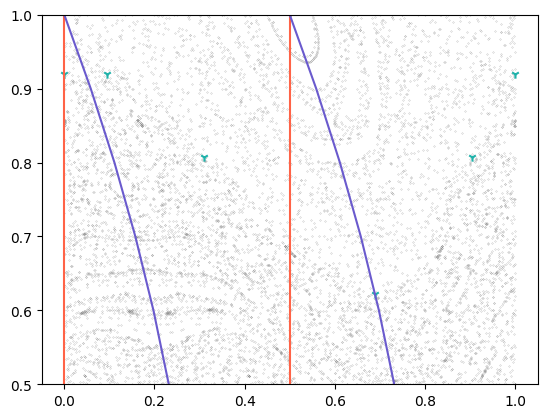

In [49]:
listaper5 = iterar(Mapeo3B,periodoM5B[1],5,1);
GraficarMap(Mapeo3A)
scatter(listaper5[1],listaper5[2], marker = "1", color = coloresp[4])
plot(listasim1X, listasim1Y, label = "", color = "tomato")
plot(listasim2X, listasim1Y, label = "", color = "tomato")
plot(listasim3X, listasim1Y, label = "", color = "slateblue")
plot(listasim4X, listasim1Y, label = "", color = "slateblue")
# xlim(-0.01,1.01)
ylim(0.5,1.0)
savefig("MapeoCP5D.pdf")

In [50]:
a = 0.618
b = 0.3
#funcion que se usa en el método de puntos periódico
Mapeo3B(x) = MapeoNT(x,a,b)
#definimos funciones para el mapeo iterado.
Mapeo3A(x,y)=MapeoN(x,y,a,b)

#definimos unas listas que serán las línea de simetría del mapeo.
listasim1Y = [y for y in -1.0:0.1:1.0] 
listasim1X = [0.0 for y in listasim1Y]
listasim2X = [1/2 for y in listasim1Y]
listasim3X = [(a*(1-y^2))/2.0 for y in listasim1Y]
listasim4X = [(a*(1-y^2))/2.0 + 1/2.0 for y in listasim1Y];
#definimos las simetrias, las necesitamos en forma de vector y en forma de función
simetria1v(x,y) = [0,y]
simetria2v(x,y) = [1/2,y]
simetria3v(x,y) = [(a*(1-y^2))/2.0,y]
simetria4v(x,y) = [(a*(1-y^2))/2.0 + 1/2.0,y]
simetria1f(x,y) = x
simetria2f(x,y) = x-1/2.0
simetria3f(x,y) = x - (a*(1-y^2))/2.0
simetria4f(x,y) = x - (a*(1-y^2))/2.0 - 1/2.0

simetria4f (generic function with 1 method)

### Periodo 5

In [51]:
periodoM5C = []
append!(periodoM5C , [periodicosN(Mapeo3B,simetria1v,simetria4f,3,3/5)])

1-element Array{Any,1}:
 [0.0, 0.9426038272624389]

In [52]:
Buscaperiodo(periodoM5C[1],Mapeo3B,1,1e-10)

5.0

In [53]:
ErrorP5C =[]
append!(ErrorP5C,ErrorOrdenNM(periodoM5C[1],5, Mapeo3B))

1-element Array{Any,1}:
 1.3322676295501878e-15

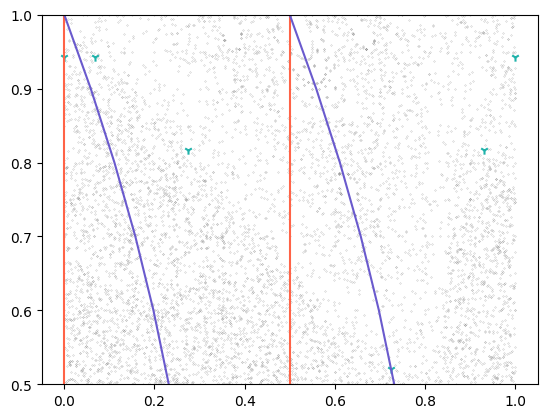

In [54]:
listaper5 = iterar(Mapeo3B,periodoM5C[1],5,1);
GraficarMap(Mapeo3A)
scatter(listaper5[1],listaper5[2], marker = "1", color = coloresp[4])
plot(listasim1X, listasim1Y, label = "", color = "tomato")
plot(listasim2X, listasim1Y, label = "", color = "tomato")
plot(listasim3X, listasim1Y, label = "", color = "slateblue")
plot(listasim4X, listasim1Y, label = "", color = "slateblue")
# xlim(-0.01,1.01)
ylim(0.5,1.0)
savefig("MapeoCP5E.pdf")

In [55]:
a = 0.618
b = 0.4
#funcion que se usa en el método de puntos periódico
Mapeo3B(x) = MapeoNT(x,a,b)
#definimos funciones para el mapeo iterado.
Mapeo3A(x,y)=MapeoN(x,y,a,b)

#definimos unas listas que serán las línea de simetría del mapeo.
listasim1Y = [y for y in -1.0:0.1:1.0] 
listasim1X = [0.0 for y in listasim1Y]
listasim2X = [1/2 for y in listasim1Y]
listasim3X = [(a*(1-y^2))/2.0 for y in listasim1Y]
listasim4X = [(a*(1-y^2))/2.0 + 1/2.0 for y in listasim1Y];
#definimos las simetrias, las necesitamos en forma de vector y en forma de función
simetria1v(x,y) = [0,y]
simetria2v(x,y) = [1/2,y]
simetria3v(x,y) = [(a*(1-y^2))/2.0,y]
simetria4v(x,y) = [(a*(1-y^2))/2.0 + 1/2.0,y]
simetria1f(x,y) = x
simetria2f(x,y) = x-1/2.0
simetria3f(x,y) = x - (a*(1-y^2))/2.0
simetria4f(x,y) = x - (a*(1-y^2))/2.0 - 1/2.0

simetria4f (generic function with 1 method)

### Perdiodo 5

In [56]:
periodoM5D = []
append!(periodoM5D , [periodicosN(Mapeo3B,simetria1v,simetria4f,3,3/5)])

1-element Array{Any,1}:
 [0.0, 0.9566572096978828]

In [57]:
Buscaperiodo(periodoM5D[1],Mapeo3B,1,1e-10)

5.0

In [58]:
ErrorP5D =[]
append!(ErrorP5D,ErrorOrdenNM(periodoM5D[1],5, Mapeo3B))

1-element Array{Any,1}:
 1.9984014443252818e-15

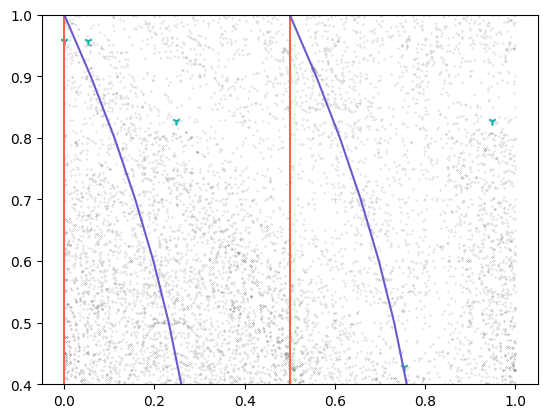

In [59]:
listaper5 = iterar(Mapeo3B,periodoM5D[1],5,1);
GraficarMap(Mapeo3A)
scatter(listaper5[1],listaper5[2], marker = "1", color = coloresp[4])
plot(listasim1X, listasim1Y, label = "", color = "tomato")
plot(listasim2X, listasim1Y, label = "", color = "tomato")
plot(listasim3X, listasim1Y, label = "", color = "slateblue")
plot(listasim4X, listasim1Y, label = "", color = "slateblue")
# xlim(-0.01,1.01)
ylim(0.4,1.0)
savefig("MapeoCP5F.pdf")

# Si lo hacemos iterativo 

periodo 5.0
periodo 

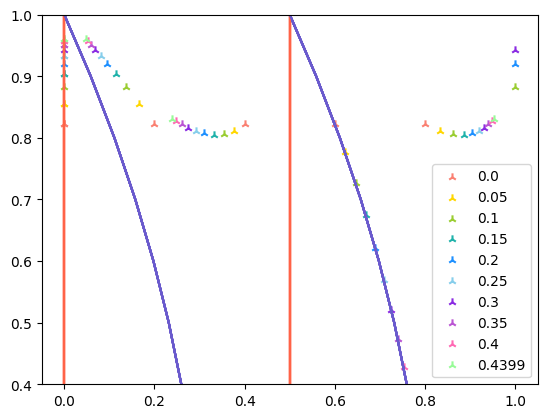

5.0
periodo 5.0
periodo 5.0
periodo 5.0
periodo 5.0
periodo 5.0
periodo 5.0
periodo 5.0
periodo 5.0


In [60]:
a = 0.618
lista_b = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.4399]
i = 0
listasim1Y = [y for y in -1.0:0.1:1.0] 
listasim1X = [0.0 for y in listasim1Y]
listaasim2X = [1/2 for y in listasim1Y]
listasim3X = [(a*(1-y^2))/2.0 for y in listasim1Y]
listasim4X = [(a*(1-y^2))/2.0 + 1/2.0 for y in listasim1Y];
simetria1v(x,y) = [0,y]
simetria4f(x,y) = x - (a*(1-y^2))/2.0 - 1/2.0
ErrorP5 =[]
periodo5 = []
fig, ax = subplots()
for b in lista_b
    i += 1
    Mapeo5P(x) = MapeoNT(x,a,b)
    Mapeo5G(x,y)=MapeoN(x,y,a,b)
    append!(periodo5 , [periodicosN(Mapeo5P,simetria1v,simetria4f,3,3/5)])
    print("periodo " ,Buscaperiodo(periodo5[i],Mapeo5P,1,1e-10), "\n")
    append!(ErrorP5,ErrorOrdenNM(periodo5[i],5, Mapeo5P))
    listaper5 = iterar(Mapeo5P,periodo5[i],5,1)
    #figura1 = 
    #GraficarMap(Mapeo5G)
    
    plot(listasim1X, listasim1Y, label = "", color = "tomato")
    plot(listasim2X, listasim1Y, label = "", color = "tomato")
    plot(listasim3X, listasim1Y, label = "", color = "slateblue")
    plot(listasim4X, listasim1Y, label = "", color = "slateblue")
    ax.scatter(listaper5[1],listaper5[2], marker = "2", color = coloresp[i], label = "$b")
    ylim(0.4,1.0)
end
ax.legend()
savefig("MapeoCuadraP5b.pdf")


### Otros periodos

In [61]:
a = 0.618
b = 0.2
#funcion que se usa en el método de puntos periódico
Mapeo3B(x) = MapeoNT(x,a,b)
#definimos funciones para el mapeo iterado.
Mapeo3A(x,y)=MapeoN(x,y,a,b)


#definimos las simetrias, las necesitamos en forma de vector y en forma de función
simetria1v(x,y) = [0,y]
simetria2v(x,y) = [1/2,y]
simetria3v(x,y) = [(a*(1-y^2))/2.0,y]
simetria4v(x,y) = [(a*(1-y^2))/2.0 + 1/2.0,y]
simetria1f(x,y) = x
simetria2f(x,y) = x-1/2.0
simetria3f(x,y) = x - (a*(1-y^2))/2.0
simetria4f(x,y) = x - (a*(1-y^2))/2.0 - 1/2.0

simetria4f (generic function with 1 method)

In [62]:
periodoM2 = []
append!(periodoM2 , [periodicosN(Mapeo3B,simetria1v,simetria2f,1,1/2)])
append!(periodoM2 , [periodicosN(Mapeo3B,simetria2v,simetria1f,1,1/2)])
append!(periodoM2 , [periodicosN(Mapeo3B,simetria3v,simetria4f,1,1/2)])
append!(periodoM2 , [periodicosN(Mapeo3B,simetria4v,simetria3f,1,1/2)])


4-element Array{Any,1}:
 [0.0, 0.4369651145421809]
 [0.5, 1.3450135644941055]
 [0.22404218854955887, 0.5243513837361575]
 [0.17589171088013206, 1.4313958710107062]

In [63]:
#nos aseguramos que son de periodo 2
per2 = []
for i in 1:4
    p = Buscaperiodo(periodoM2[i],Mapeo3B,1,1e-10)
    if Int(p) == 2
        append!(per2, [periodoM2[i]])
    end
end
periodoM2 = per2
#Errores
ErrorP2 = []
for i in 1:length(periodoM2)
    print(ErrorONE(periodoM2[i],2), "\n")
    append!(ErrorP2,ErrorONE(periodoM2[i],2))
    
end

3.3306690738754696e-16
4.440892098500626e-16
0.0
1.1102230246251565e-15


### PEriodo 3

In [64]:
periodoM3 = []
#append!(periodoM3 , [periodicosN(Mapeo3B,simetria1v,simetria3f,2,9/2)])
append!(periodoM3 , [periodicosN(Mapeo3B,simetria1v,simetria4f,2,2/2)])
#append!(periodoM3 , [periodicosN(Mapeo3B,simetria2v,simetria4f,2,9/2)])
#append!(periodoM3 , [periodicosN(Mapeo3B,simetria2v,simetria4f,2,9/2)])

1-element Array{Any,1}:
 [0.0, 0.737723688316476]

In [65]:
#nos aseguramos que son de periodo 3
per3 = []
for i in 1:length(periodoM3)
    p = Buscaperiodo(periodoM3[i],Mapeo3B,1,1e-10)
    if Int(p) == 3
        append!(per3, [periodoM3[i]])
    end
end
periodoM3 = per3
#Errores
ErrorP3 = []
for i in 1:length(periodoM3)
    print(periodoM3[i],"\n")
    print(ErrorONE(periodoM3[i],2), "\n")
    
    append!(ErrorP3,ErrorONE(periodoM3[i],3))
    
end

[0.0, 0.737723688316476]
0.2553878899801125


### Periodo 4

In [66]:
periodoM4 = []
append!(periodoM4 , [periodicosN(Mapeo3B,simetria1v,simetria2f,2,1/4)])
append!(periodoM4 , [periodicosN(Mapeo3B,simetria3v,simetria4f,2,1/4)])
append!(periodoM4 , [periodicosN(Mapeo3B,simetria2v,simetria1f,2,1/4)])
append!(periodoM4 , [periodicosN(Mapeo3B,simetria4v,simetria3f,2,1/4)])

4-element Array{Any,1}:
 [0.0, 0.8536632856333443]
 [0.07121440059144517, 0.8772301204188558]
 [0.5, 1.2590488114922205]
 [0.24817127864127142, 1.3472118173370453]

In [67]:
#nos aseguramos que son de periodo 4
per4 = []
for i in 1:4
    p = Buscaperiodo(periodoM4[i],Mapeo3B,1,1e-10)
    if Int(p) == 4
        append!(per4, [periodoM4[i]])
    end
end
periodoM4 = per4
#Errores
ErrorP4 = []
for i in 1:length(periodoM4)
    print(ErrorONE(periodoM4[i],4), "\n")
    append!(ErrorP4,ErrorONE(periodoM4[i],4))
    
end

0.0
0.0
1.5543122344752192e-15
9.992007221626409e-16


### Periodo 5

In [68]:
periodoM5 = []
append!(periodoM5 , [periodicosN(Mapeo3B,simetria1v,simetria4f,3,1/5)])
append!(periodoM5 , [periodicosN(Mapeo3B,simetria2v,simetria4f,3,3/5)])

2-element Array{Any,1}:
 [0.0, 0.919830285362941]
 [0.5, 0.8771063118093677]

In [69]:
#nos aseguramos que son de periodo 5
per5 = []
for i in 1:length(periodoM5)
    p = Buscaperiodo(periodoM5[i],Mapeo3B,1,1e-10)
    if Int(p) == 5
        append!(per5, [periodoM5[i]])
        print(periodoM5[i], "\n")
    end
end
periodoM5 = per5
#Errores
ErrorP5 = []
for i in 1:length(periodoM5)
    print(ErrorONE(periodoM5[i],5), "\n")
    append!(ErrorP5,ErrorONE(periodoM5[i],5))
    
end

[0.0, 0.919830285362941]
[0.5, 0.8771063118093677]
7.771561172376096e-16
3.1401849173675503e-16


### Periodo 6

In [70]:
periodoM6 = []

append!(periodoM6 , [periodicosN(Mapeo3B,simetria1v,simetria2f,3,1/6)])
append!(periodoM6 , [periodicosN(Mapeo3B,simetria2v,simetria1f,3,1/6)])
append!(periodoM6 , [periodicosN(Mapeo3B,simetria3v,simetria4f,3,3/6)])
append!(periodoM6 , [periodicosN(Mapeo3B,simetria4v,simetria3f,3,1/6)])

4-element Array{Any,1}:
 [0.0, 0.9545198858406706]
 [0.5, 1.249716073765359]
 [0.023046623249516784, 0.9619851655506065]
 [0.2564907463677316, 1.3371820508059598]

In [71]:
#nos aseguramos que son de periodo 6
per6 = []
for i in 1:length(periodoM6)
    p = Buscaperiodo(periodoM6[i],Mapeo3B,1,1e-10)
    if Int(p) == 6
        append!(per6, [periodoM6[i]])
        print(periodoM6[i], "\n")
    end
end
periodoM6 = per6
#Errores
ErrorP6 = []
for i in 1:length(periodoM6)
    print(ErrorONE(periodoM6[i],6), "\n")
    append!(ErrorP6,ErrorONE(periodoM6[i],6))
    
end

[0.0, 0.9545198858406706]
[0.5, 1.249716073765359]
[0.023046623249516784, 0.9619851655506065]
[0.2564907463677316, 1.3371820508059598]
8.881784197001252e-16
1.0658141036401503e-14
1.3322676295501878e-15
2.0650148258027912e-14


### Periodo 7

In [72]:
periodoM7 = []
i=1
#append!(periodoM7 , [periodicosN(Mapeo3B,simetria1v,simetria3f,4,i/7)])
append!(periodoM7 , [periodicosN(Mapeo3B,simetria1v,simetria4f,4,1/7)])
append!(periodoM7 , [periodicosN(Mapeo3B,simetria2v,simetria3f,4,1/7)])
append!(periodoM7 , [periodicosN(Mapeo3B,simetria2v,simetria4f,4,1/7)])

3-element Array{Any,1}:
 [0.0, 0.9751547206029099]
 [0.5, 1.249000450155032]
 [0.5, 1.217973379106356]

In [73]:
#nos aseguramos que son de periodo 7
per7 = []
for i in 1:length(periodoM7)
    p = Buscaperiodo(periodoM7[i],Mapeo3B,1,1e-10)
    if Int(p) == 7
        append!(per7, [periodoM7[i]])
        print(periodoM7[i], "\n")
    end
end
periodoM7 = per7
#Errores
ErrorP7 = []
for i in 1:length(periodoM7)
    print(ErrorONE(periodoM7[i],7), "\n")
    append!(ErrorP7,ErrorONE(periodoM7[i],7))
    
end

[0.0, 0.9751547206029099]
[0.5, 1.249000450155032]
[0.5, 1.217973379106356]
1.6653345369377348e-15
1.0880185641326534e-13
4.965068306494546e-16


### Periodo 19

In [74]:
periodoM19 = []

append!(periodoM19 , [periodicosN(Mapeo3B,simetria2v,simetria3f,10,22/19)])
append!(periodoM19 , [periodicosN(Mapeo3B,simetria2v,simetria4f,10,2/19)])

2-element Array{Any,1}:
 [0.5, -1.1400763240270146]
 [0.5, 0.778109725566156]

In [75]:
#nos aseguramos que son de periodo 19
per19 = []
for i in 1:length(periodoM19)
    p = Buscaperiodo(periodoM19[i],Mapeo3B,1,1e-10)
    if Int(p) == 19
        append!(per19, [periodoM19[i]])
        print(periodoM19[i], "\n")
    end
end
periodoM19 = per19
#Errores
ErrorP19 = []
for i in 1:length(periodoM19)
    print(ErrorONE(periodoM19[i],19), "\n")
    append!(ErrorP19,ErrorONE(periodoM19[i],19))
    
end

[0.5, -1.1400763240270146]
[0.5, 0.778109725566156]
1.176836406102666e-14
1.771145023259792e-14


### Periodo 20

In [76]:
periodoM20 = []
append!(periodoM20 , [periodicosN(Mapeo3B,simetria4v,simetria3f,10,1/20)])
append!(periodoM20 , [periodicosN(Mapeo3B,simetria3v,simetria4f,10,4/20)])


2-element Array{Any,1}:
 [0.2776238523110893, 1.3113595648708831]
 [0.013606525256824754, 0.9777351060896703]

In [77]:
#nos aseguramos que son de periodo 20
per20 = []
for i in 1:length(periodoM20)
    p = Buscaperiodo(periodoM20[i],Mapeo3B,1,1e-10)
    if Int(p) == 20
        append!(per20, [periodoM20[i]])
        print(periodoM20[i], "\n")
    end
end
periodoM20 = per20
#Errores
ErrorP20 = []
for i in 1:length(periodoM20)
    print(ErrorONE(periodoM20[i],20), "\n")
    append!(ErrorP20,ErrorONE(periodoM20[i],20))
    
end


[0.2776238523110893, 1.3113595648708831]
[0.013606525256824754, 0.9777351060896703]
3.11972669919669e-14
3.0730973321624333e-12


In [78]:
periodoM20

2-element Array{Any,1}:
 [0.2776238523110893, 1.3113595648708831]
 [0.013606525256824754, 0.9777351060896703]

In [79]:
listaper21 = iterar(Mapeo3B,periodoM2[1],2,1);
listaper22 = iterar(Mapeo3B,periodoM2[2],2,1);
listaper23 = iterar(Mapeo3B,periodoM2[3],2,1);
listaper24 = iterar(Mapeo3B,periodoM2[4],2,1);
listaper31 = iterar(Mapeo3B,periodoM3[1],3,1);
# listaper32 = iterar(Mapeo3B,periodoM3[2],3,1);
# listaper33 = iterar(Mapeo3B,periodoM3[3],3,1);
listaper41 = iterar(Mapeo3B,periodoM4[1],4,1);
listaper42 = iterar(Mapeo3B,periodoM4[2],4,1);
listaper43 = iterar(Mapeo3B,periodoM4[3],4,1);
listaper44 = iterar(Mapeo3B,periodoM4[4],4,1);
listaper51 = iterar(Mapeo3B,periodoM5[1],5,1);
listaper52 = iterar(Mapeo3B,periodoM5[2],5,1);
listaper61 = iterar(Mapeo3B,periodoM6[1],6,1);
listaper62 = iterar(Mapeo3B,periodoM6[2],6,1);
listaper63 = iterar(Mapeo3B,periodoM6[3],6,1);
listaper64 = iterar(Mapeo3B,periodoM6[4],6,1);
listaper71 = iterar(Mapeo3B,periodoM7[1],7,1);
listaper72 = iterar(Mapeo3B,periodoM7[2],7,1);
listaper73 = iterar(Mapeo3B,periodoM7[3],7,1);
listaper191 = iterar(Mapeo3B,periodoM19[1],19,1);
listaper192 = iterar(Mapeo3B,periodoM19[2],19,1);
#listaper193 = iterar(Mapeo3B,periodoM19[3],19,1);
listaper201 = iterar(Mapeo3B,periodoM20[1],20,1);
listaper202 = iterar(Mapeo3B,periodoM20[2],20,1);
#listaper203 = iterar(Mapeo3B,periodoM20[3],20,1);

In [80]:
#definimos unas listas que serán las línea de simetría del mapeo.
listasim1Y = [y for y in -2.0:0.1:2.0] 
listasim1X = [0.0 for y in listasim1Y]
listasim2X = [1/2 for y in listasim1Y]
listasim3X = [(a*(1-y^2))/2.0 for y in listasim1Y]
listasim4X = [(a*(1-y^2))/2.0 + 1/2.0 for y in listasim1Y];

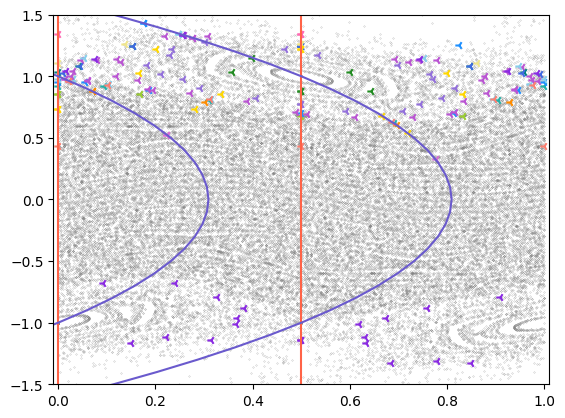

In [81]:
GraficarMap(Mapeo3A)
scatter(listaper21[1],listaper21[2], marker = "3", color = coloresp[1])
scatter(listaper31[1],listaper31[2], marker = "3", color = coloresp[2])
scatter(listaper41[1],listaper41[2], marker = "3", color = coloresp[3])
scatter(listaper51[1],listaper51[2], marker = "3", color = coloresp[4])
scatter(listaper61[1],listaper61[2], marker = "3", color = coloresp[5])
scatter(listaper71[1],listaper71[2], marker = "3", color = coloresp[6])
scatter(listaper191[1],listaper191[2], marker = "3", color = coloresp[7])
scatter(listaper201[1],listaper201[2], marker = "3", color = coloresp[8])
scatter(listaper22[1],listaper22[2], marker = "3", color = coloresp[9])
#scatter(listaper32[1],listaper32[2], marker = "3", color = coloresp[10])
scatter(listaper42[1],listaper42[2], marker = "3", color = coloresp[11])
scatter(listaper52[1],listaper52[2], marker = "3", color = coloresp[12])
scatter(listaper62[1],listaper62[2], marker = "3", color = coloresp[13])
scatter(listaper72[1],listaper72[2], marker = "3", color = coloresp[14])
scatter(listaper192[1],listaper192[2], marker = "3", color = coloresp[15])
scatter(listaper202[1],listaper202[2], marker = "3", color = coloresp[16])

scatter(listaper23[1],listaper23[2], marker = "3", color = coloresp[17])
#scatter(listaper33[1],listaper33[2], marker = "3", color = coloresp[18])
scatter(listaper43[1],listaper43[2], marker = "3", color = coloresp[19])
scatter(listaper63[1],listaper63[2], marker = "3", color = coloresp[1])
scatter(listaper73[1],listaper73[2], marker = "3", color = coloresp[2])
#scatter(listaper193[1],listaper193[2], marker = "3", color = coloresp[3])
#scatter(listaper203[1],listaper203[2], marker = "3", color = coloresp[4])

scatter(listaper24[1],listaper24[2], marker = "3", color = coloresp[5])
scatter(listaper44[1],listaper44[2], marker = "3", color = coloresp[6])
scatter(listaper64[1],listaper64[2], marker = "3", color = coloresp[7])

plot(listasim1X, listasim1Y, label = "", color = "tomato")
plot(listasim2X, listasim1Y, label = "", color = "tomato")
plot(listasim3X, listasim1Y, label = "", color = "slateblue")
plot(listasim4X, listasim1Y, label = "", color = "slateblue")
xlim(-0.01,1.01)
ylim(-1.5,1.5)
savefig("MapeoCuadraDifP.pdf")

# Para determinar la estabilidad de las órbitas!

In [82]:
using SymPy
x = symbols("x")
y = symbols("y")

function jacobianosym(func)
    x = symbols("x")
    y = symbols("y")
    X = func
    Y = [x,y]
    j = X.jacobian(Y)
    return j
end
   

function jacobianeval(jacobiano,punto)
    #N(subs(subs(X.jacobian(Y)[4],phi,1),rho,1))
    m1 = N(subs(subs(jacobiano[1],x,punto[1]),y,punto[2]))
    m2 = N(subs(subs(jacobiano[2],x,punto[1]),y,punto[2]))
    m3 = N(subs(subs(jacobiano[3],x,punto[1]),y,punto[2]))
    m4 = N(subs(subs(jacobiano[4],x,punto[1]),y,punto[2]))
    return [[m1 m2];[m3 m4]]
end


function determinaestabilidad(punto,funcv,mapeo,n)
    jacobi = jacobianosym(funcv)
    m = Matrix(I,2,2)
    for i in 1:n
        m_n = jacobianeval(jacobi, punto)
        punto = mapeo(punto)
        m = m*m_n
    end
    E = eigen(m)
    values1 = [abs(E.values[1]),abs(E.values[2])]
    values1 = sort(values1)
    if (abs(values1[1])<1) && (abs(values1[2])>1)
        print("el punto es hiperbólico")
    else
        print("el punto no es hiperbólico")
    end
    return E
end

determinaestabilidad (generic function with 1 method)

In [83]:
[y - b*(sin(2pi*x)), x + a*(1.0-vy^2)]

2-element Array{Any,1}:
 [0.0, 0.919830285362941]
 [0.5, 0.8771063118093677]

In [86]:
determinaestabilidad(periodoM5[1],[y - b*(sin(2pi*x)), x + a*(1.0-(y - b*(sin(2pi*x)))^2)], Mapeo2B, 5 )

el punto es hiperbólico

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 -24.729794104647457
   0.04043705320668778
vectors:
2×2 Array{Float64,2}:
 -0.852024  -0.831917
  0.523503  -0.5549